# Lessons from a fake social network

The hot new social network, ChapSnat, has just launched with five members: Ronald, Scott, Trish, Uriah, and Victoria. In ChapSnat it is possible for two people to "follow" each other, and for one person to follow another without that person following back. Here is a directed graph that gives an initial look at who is following who: 

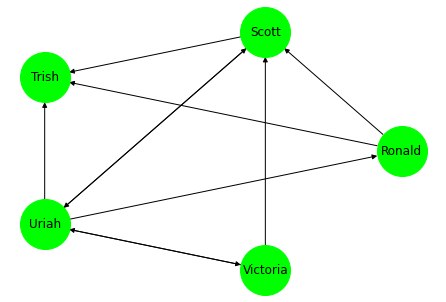

In [1]:
import networkx as nx

chapsnat_edges = [('Ronald', 'Scott'), ('Ronald', 'Trish'), ('Scott', 'Uriah'), ('Scott', 'Trish'), 
                  ('Uriah', 'Ronald'), ('Uriah', 'Scott'), ('Uriah', 'Trish'), ('Uriah', 'Victoria'), 
                  ('Victoria', 'Uriah'), ('Victoria', 'Scott')]

chapsnat = nx.DiGraph(chapsnat_edges)
nx.draw_circular(chapsnat, with_labels = True, node_size = 2500, node_color = "lime")

If we let $S$ be the set of users, then what we have here is a **relation on $S$**. That relation was just given in two ways: As a set of ordered pairs (in `chapsnat_edges`) and as a directed graph. You can see that: 

- The relation is *not reflexive* because there are vertices without self-loops. (In fact, none of the vertices have self-loops.)
- The relation is *not symmetric* because it's not always the case that if $a \sim b$, then $b \sim a$. For example, $\text{Victoria} \sim \text{Scott}$ but $\text{Scott} \not \sim \text{Victoria}$. 
- The relation is also *not transitive* because it's not always the case that if $a \sim b$ and $b \sim c$, then $a \sim c$. For example $\text{Victoria} \sim \text{Scott}$ and $\text{Scott} \sim \text{Trish}$, but $\text{Victoria} \not \sim \text{Trish}$. 

This network has a lot of *potential* connections in it that are not currently realized. For example, Chapsnat might message Victoria to say: 

>Hi Victoria! Your friend Scott follows Trish, who is not currently in your network. Click here to follow Trish: 

Although Trish is not in Victoria's network, Trish *is* in the network of at least one person (Scott) who *does* currently belong to Victoria's network. So Trish is in what we might call the "second-level network" of Victoria. Trish is a "friend of a friend". 

## Composition of a relation

This concept of a "second-level network" is captured in the mathematical idea of a **composition** of a relation with itself: 

>**Definition:** If $r$ is a relation on a set $A$, then $r \circ r$ or $r^2$ is the **composition of $r$ with itself**, and equals: 
$$r^2 = \{(a,c) \, : \, \exists b \ \text{such that} \ (a,b) \in r \ \text{and} \ (b,c) \in r \}$$

In other words, $r^2$ is a set of ordered pairs (just like $r$ is) and an ordered pair $(a,b)$ belongs to this composition if there is an element $b$ that "links" $a$ to $c$ in the sense that $a \sim b$ and $b \sim c$. 

In social network language, $(a,c)$ would belong to the composition if $a$ and $c$ are not necessarily related, but there is a "friend in common", $b$, so that $a$ follows $b$ and $b$ follows $c$. 

## Back to Chapsnat 

Let $c$ be the "follows on Chapsnat" relation. So for example, $(\text{Ronald}, \text{Scott}) \in c$. What are some pairs in $c^2$, the composition of $c$ with itself? Well, look at all the outgoing edges from Scott: There's one from Scott to Trish and another from Scott to Uriah. Scott therefore is a link from Ronald to Trish and from Ronald to Uriah. So $(\text{Ronald}, \text{Trish}) \in c^2$ and $(\text{Ronald}, \text{Uriah}) \in c^2$. 

However, $(\text{Ronald}, \text{Victoria}) \not \in c^2$. That's becase there's no single person linking Ronald and Victoria. However, there is a *chain* of people leading from Ronald to Victoria; we'll look at that in a minute. 

If you loop through each person in the network and find all the possible second-level connections like this, you'll end up with this list: 

```
[(Ronald, Uriah), (Ronald, Trish), (Scott, Ronald), (Scott, Scott), 
 (Scott, Trish), (Scott, Victoria), (Uriah, Scott), (Uriah, Trish), 
 (Uriah, Uriah), (Victoria, Ronald), (Victoria, Scott), (Victoria, Trish), 
 (Victoria, Victoria), (Victoria, Uriah)]
```

The self-loops (like `(Uriah, Uriah)`) are a lttle weird. These are the results of the mathematical definition. There is an edge from Uriah to Scott and then from Scott back to Uriah. So $(\text{Uriah}, \text{Scott}) \in c$ and $(\text{Scott}, \text{Uriah}) \in c$, so technically $(\text{Uriah}, \text{Uriah}) \in c^2$. Mathematically this is the case; in real life, probably Uriah would not be allowed to follow himself. 

Notice that **the composition of a relation with itself is another relation**. We can look at a composition as a list of ordered pairs like above, and then turn that into a directed graph: 

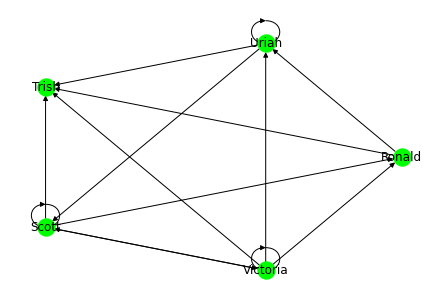

In [2]:
c_squared_edges = [('Ronald', 'Uriah'), ('Ronald', 'Trish'), 
 ('Scott', 'Ronald'), ('Scott', 'Scott'), ('Scott', 'Trish'), ('Scott', 'Victoria'), 
 ('Uriah', 'Scott'), ('Uriah', 'Trish'), ('Uriah', 'Uriah'), 
 ('Victoria', 'Ronald'), ('Victoria', 'Scott'), ('Victoria', 'Trish'), ('Victoria', 'Victoria'), ('Victoria', 'Uriah')]

c_squared = nx.DiGraph(c_squared_edges)
nx.draw_circular(c_squared, with_labels = True, node_color = "lime")

If we compare this to the original digraph for  above, there's some information that comes out that could be useful.

- First of all notice that not every edge in the original graph appears in the  graph. For example there is no edge from Ronald to Scott in . This is a different relation, and it doesn't necessarily "include" the original.
- Notice for example that in the original, Victoria does not follow Trish. But in  there is an edge pointing from Victoria to Trish in the  graph. Why is this? It's because although Victoria does not follow Trish directly, she follows someone who follows Trish. Because there is a "link", we have an edge from Victoria to Trish in the composition.
- Likewise Ronald does not follow Uriah in the original ChapSnat. But Ronald does follow Scott, who follows Uriah. Hence there's an edge in  from Ronald to Uriah.

In other words this  graph is giving us information not about who follows whom, but rather about the **second-level relationships in the social network** -- the users who are "friends of a friend".

## Higher-order compositions

We can also think about $r^3$, which would be the relation found by looking at "third-level relationships": A pair $(a,b)$ would be in $r^3$ if there are elements $x,y \in A$ such that $(a,x) \in r$, and $(x,y) \in r$, and $(y,b) \in r$. In graph language, an edge would belong to $r^3$ if there is a **path of length 3** (3 edges, that is; so four vertices involved) starting from $a$ and ending at $b$. This would be the graph of "friends of friends of friends". For example, Ronald follows Scott; Scott follows Uriah; and Uriah follows Victoria. So Ronald follows a person, who follows a person, and that person follows Victoria. So although $(\text{Ronald}, \text{Victoria}) \not \in c$ and $(\text{Ronald}, \text{Victoria}) \not \in c^2$, it is true that $(\text{Ronald}, \text{Victoria}) \in c^3$.

## Compositions in `networkx`

There is a  `.compose()` method in `networkx`, but watch out --- it does not actually compose relations! It takes in two directed graphs as input, and simply produces the union of the nodes and vertices of the two graphs. So you might think that `nx.compose(r,r)` would compose `r` with itself, but actually all it produces is the original `r`. In your Application Problems, you'll be tasked with writing a Python function that does composition properly! 